In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Dataset

In [3]:
df = pd.read_csv(r"C:\Users\hp\Downloads\archive (16)\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data Analysis

In [4]:
c = df.corr()
c

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Cleaning

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# 0 - no fraud 
# 1 - fraud

In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
df[df['Class']==0].value_counts()

Time      V1         V2         V3         V4         V5         V6         V7         V8         V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21        V22        V23        V24        V25        V26        V27        V28        Amount  Class
163152.0  -1.196037   1.585949   2.883976   3.378471   1.511706   3.717077   0.585362  -0.156001   0.122648   4.217934   1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0.785210  -0.228008  -0.412833   0.234834   1.375790  -0.370294   0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0.858197  7.56    0        18
          -1.203617   1.574009   2.889277   3.381404   1.538663   3.698747   0.560211  -0.150911   0.124136   4.220998   1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338  -0.226776  -0.412354   0.234322   1.385597  -0.366727   0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648  -0.855262  1.51    0   

In [10]:
df.groupby('Class')['Class'].count()/df['Class'].count()*100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

<Axes: ylabel='Class'>

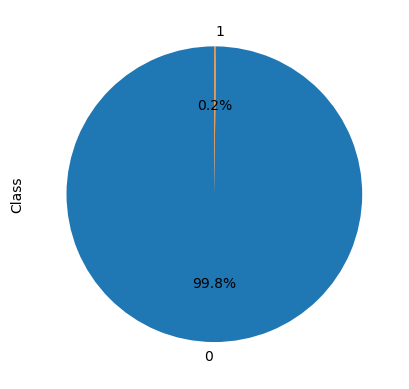

In [11]:
(df.groupby('Class')['Class'].count()/df['Class'].count()).plot.pie(wedgeprops={'linewidth': 3}, startangle=90, autopct='%1.1f%%')

<Axes: >

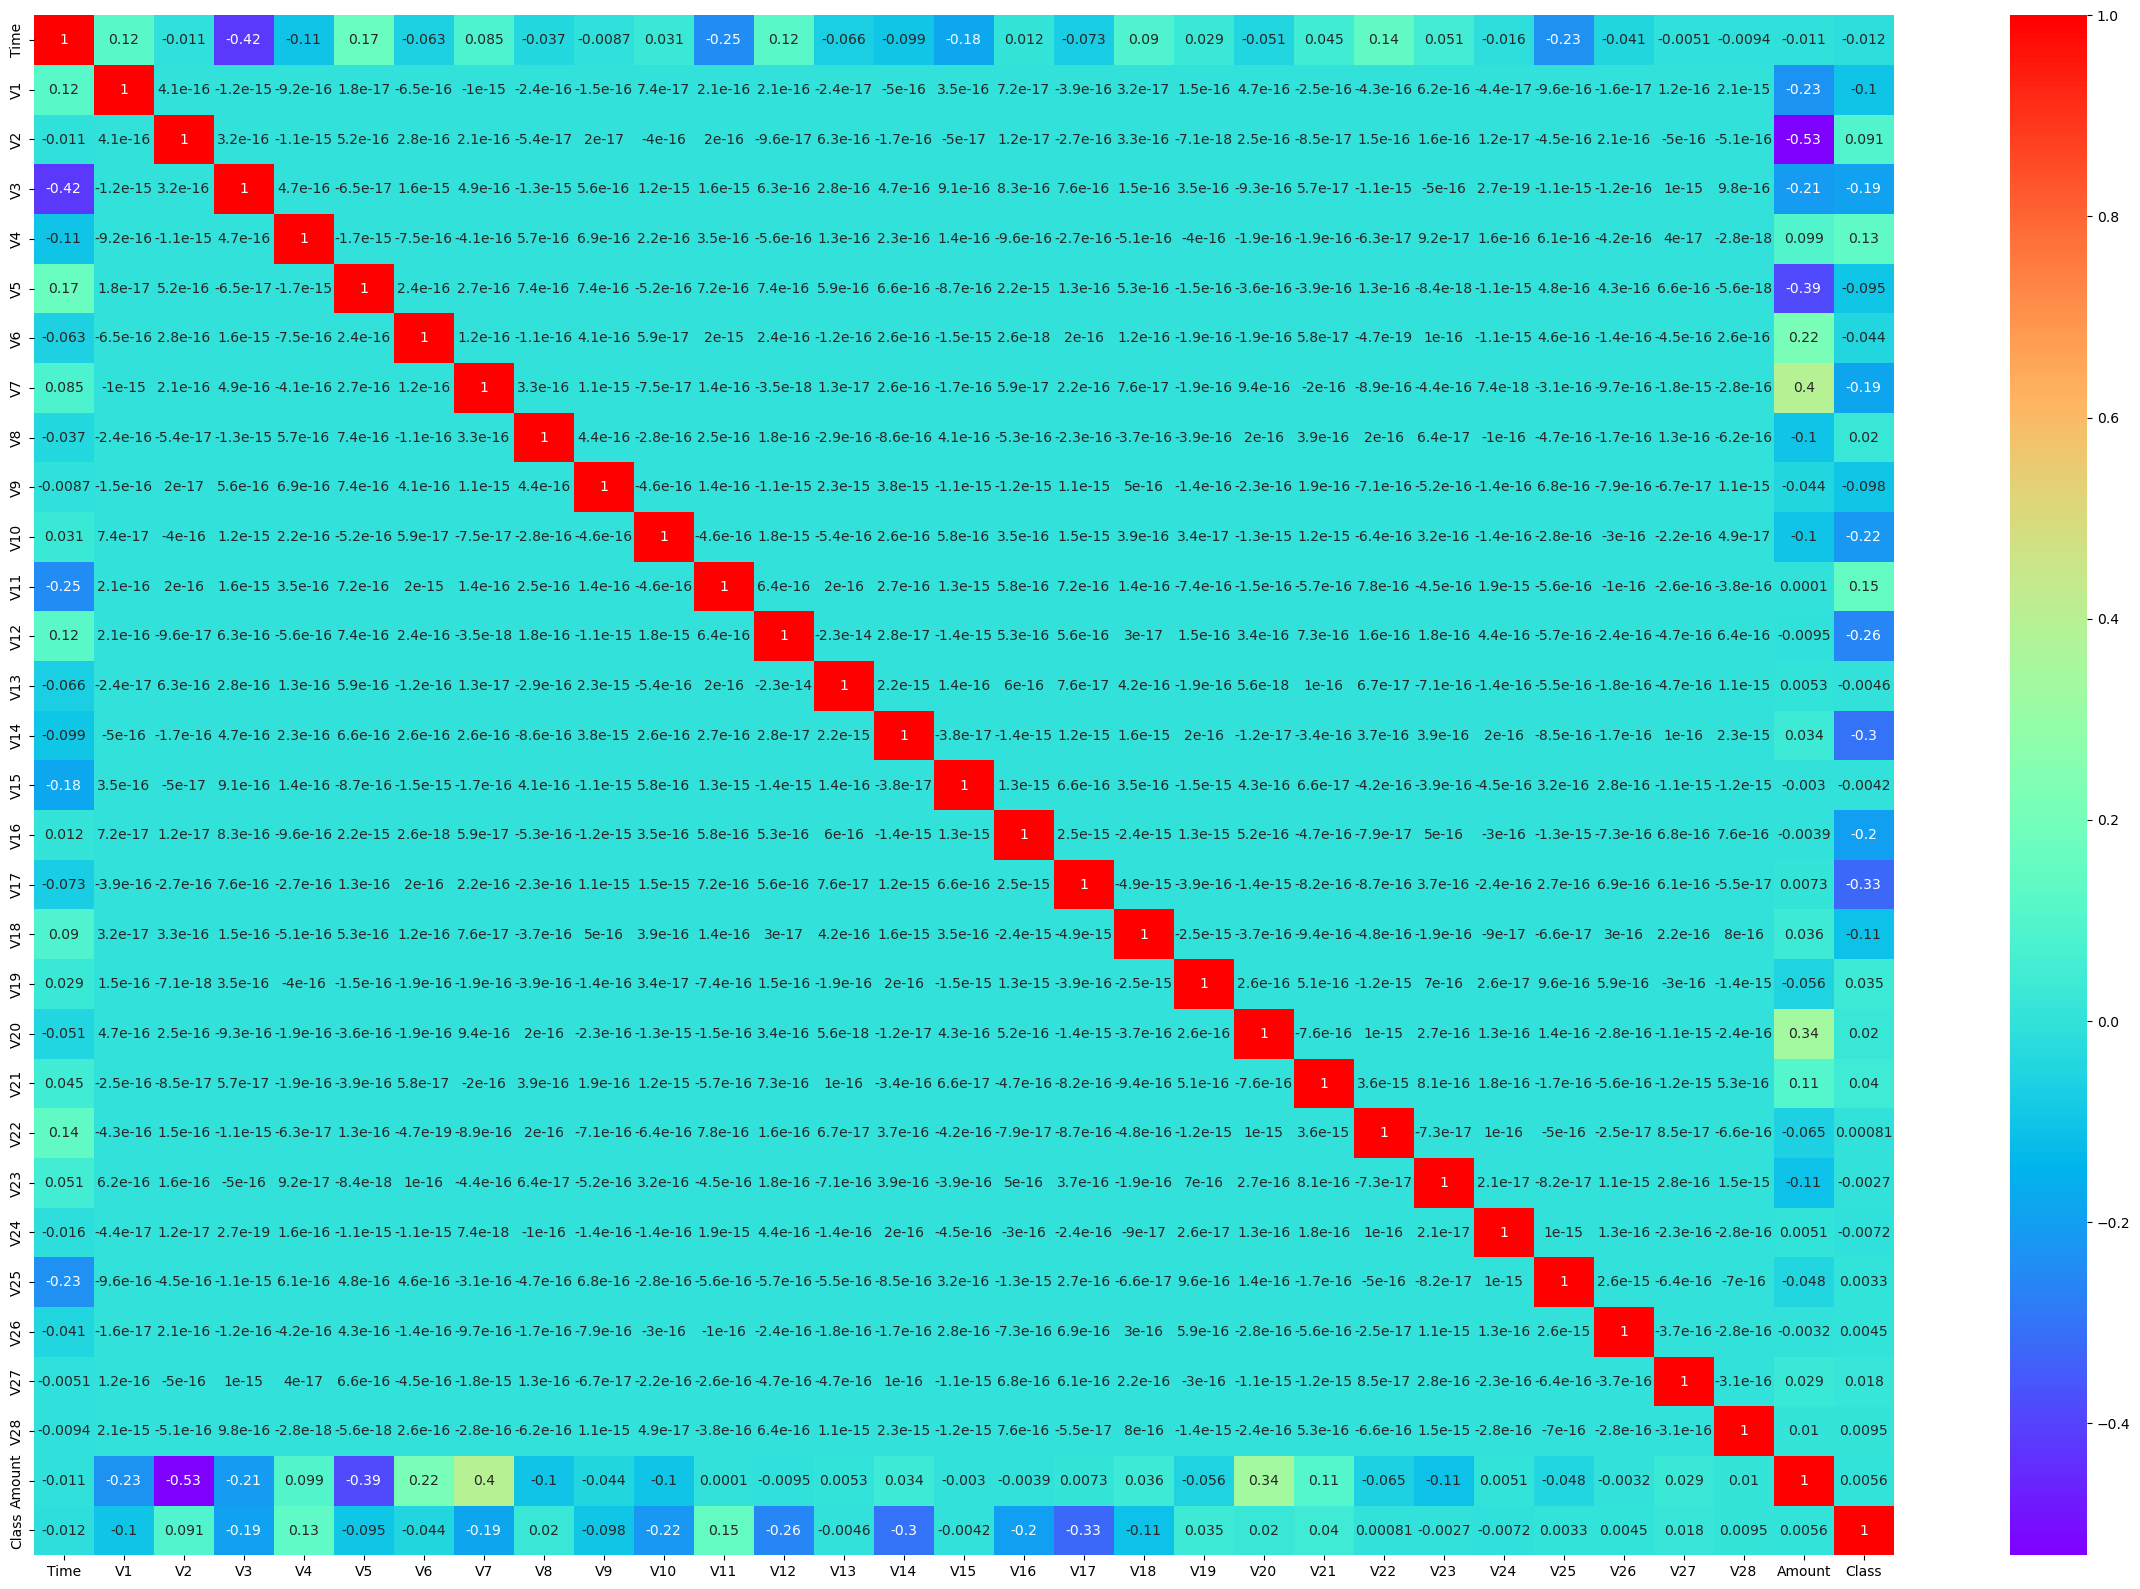

In [12]:
plt.figure(figsize=(30,20))
sns.heatmap(c,cmap = 'rainbow',annot=True)


In [13]:
no_fraud = df[df['Class']==0]
no_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
fraud = df[df['Class']==1]
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [15]:
df.groupby('Class').median()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,84711.0,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.00
1,75568.5,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.25


In [16]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
df.groupby('Class').std()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092
1,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288


In [18]:
df.groupby('Class').var()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,2.254732e+09,3.724182,2.676974,2.129933,1.958134,1.841318,1.768669,1.389598,1.348579,1.186731,...,0.591982,0.513721,0.523696,0.386313,0.366965,0.271101,0.232556,0.159877,0.108616,62552.557157
1,2.288222e+09,46.018406,18.414532,50.565429,8.255955,28.863413,3.452623,51.937575,46.210501,6.254479,...,1.813426,14.971517,2.233834,2.495270,0.265819,0.635535,0.222481,1.895484,0.299528,65886.310491


In [19]:
df.groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1            ...       V28             \
            75%       max     count      mean  ...       75%        max   
Class                                          ...                        
0      139333.0  172792.0  284315.0  0.008258  ...  0.077962  33.847808   
1      128483.0  170348.0     492.0 -4.771948  ...  0.381152   1.779364   

         Amount                                                              
          count        mean         std  min   25%    50%     75%       max  
Class                                                                        
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16  
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87  

[2 rows x 240 columns]

In [20]:
no_fraud1 = no_fraud.sample(n=500)
no_fraud1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
99946,67353.0,-5.542188,4.693302,-1.456197,-2.875245,-0.448021,-0.147467,0.363401,0.380882,4.672914,...,-1.019085,-0.689417,0.009333,-1.377105,0.830742,0.715117,0.568422,-0.703844,0.92,0
180274,124464.0,2.038586,-0.314360,-3.080258,-0.513300,2.719527,3.166604,-0.111837,0.658495,0.207281,...,-0.021941,-0.001634,0.095978,0.751844,0.247373,0.399007,-0.066953,-0.078069,19.95,0
190476,128853.0,-0.816523,0.946678,1.418825,-0.308202,-0.659385,-0.606325,-0.019709,0.492279,0.194087,...,0.282108,0.968226,-0.119641,0.455095,-0.330781,0.355592,0.267063,0.162586,7.57,0
262111,160318.0,-1.719913,1.684964,-2.686866,-2.243432,2.698160,2.793060,-0.175211,2.001645,-0.902267,...,0.010891,-0.577457,0.014389,0.597849,-0.047423,0.128468,-0.568041,-0.057376,2.10,0
138217,82545.0,-0.952598,1.048833,1.561880,0.355600,-0.270487,-0.376267,0.094704,0.558655,-0.700183,...,-0.139500,-0.652331,-0.056277,0.030380,-0.066819,0.264133,-0.087559,-0.013344,1.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75070,55885.0,-0.787584,0.807364,1.636484,0.105661,-0.111078,-1.176621,0.664759,-0.121229,-0.323006,...,-0.209459,-0.516497,0.270887,0.685355,-0.189561,0.048858,0.167451,0.092808,8.73,0
26245,33965.0,-4.953845,3.228490,-3.918461,1.209734,-3.003769,-1.507080,-1.430801,3.110331,-0.424396,...,0.188624,0.180296,-0.093109,0.409833,-0.310181,-0.390103,0.286348,-0.014918,89.99,0
158453,111278.0,0.100341,1.120611,-0.180004,-0.426174,0.998253,-0.539472,0.790773,-0.062940,0.941573,...,-0.430696,-0.869528,0.105373,0.604854,-0.486032,0.047484,0.193670,0.069377,1.78,0
257129,158015.0,-3.360755,3.618124,-1.943800,-1.554878,-0.232721,-2.537418,1.457576,-0.183663,2.223763,...,-0.155661,0.803623,0.031705,0.909115,0.188561,0.011248,1.002553,0.289222,1.54,0


In [21]:
df2 = pd.concat([no_fraud1, fraud],axis =0)
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
99946,67353.0,-5.542188,4.693302,-1.456197,-2.875245,-0.448021,-0.147467,0.363401,0.380882,4.672914,...,-1.019085,-0.689417,0.009333,-1.377105,0.830742,0.715117,0.568422,-0.703844,0.92,0
180274,124464.0,2.038586,-0.314360,-3.080258,-0.513300,2.719527,3.166604,-0.111837,0.658495,0.207281,...,-0.021941,-0.001634,0.095978,0.751844,0.247373,0.399007,-0.066953,-0.078069,19.95,0
190476,128853.0,-0.816523,0.946678,1.418825,-0.308202,-0.659385,-0.606325,-0.019709,0.492279,0.194087,...,0.282108,0.968226,-0.119641,0.455095,-0.330781,0.355592,0.267063,0.162586,7.57,0
262111,160318.0,-1.719913,1.684964,-2.686866,-2.243432,2.698160,2.793060,-0.175211,2.001645,-0.902267,...,0.010891,-0.577457,0.014389,0.597849,-0.047423,0.128468,-0.568041,-0.057376,2.10,0
138217,82545.0,-0.952598,1.048833,1.561880,0.355600,-0.270487,-0.376267,0.094704,0.558655,-0.700183,...,-0.139500,-0.652331,-0.056277,0.030380,-0.066819,0.264133,-0.087559,-0.013344,1.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [22]:
df2['time in hours'] = pd.to_timedelta(df['Time'],unit ='s').dt.components.hours.astype(int)
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time in hours
99946,67353.0,-5.542188,4.693302,-1.456197,-2.875245,-0.448021,-0.147467,0.363401,0.380882,4.672914,...,-0.689417,0.009333,-1.377105,0.830742,0.715117,0.568422,-0.703844,0.92,0,18
180274,124464.0,2.038586,-0.314360,-3.080258,-0.513300,2.719527,3.166604,-0.111837,0.658495,0.207281,...,-0.001634,0.095978,0.751844,0.247373,0.399007,-0.066953,-0.078069,19.95,0,10
190476,128853.0,-0.816523,0.946678,1.418825,-0.308202,-0.659385,-0.606325,-0.019709,0.492279,0.194087,...,0.968226,-0.119641,0.455095,-0.330781,0.355592,0.267063,0.162586,7.57,0,11
262111,160318.0,-1.719913,1.684964,-2.686866,-2.243432,2.698160,2.793060,-0.175211,2.001645,-0.902267,...,-0.577457,0.014389,0.597849,-0.047423,0.128468,-0.568041,-0.057376,2.10,0,20
138217,82545.0,-0.952598,1.048833,1.561880,0.355600,-0.270487,-0.376267,0.094704,0.558655,-0.700183,...,-0.652331,-0.056277,0.030380,-0.066819,0.264133,-0.087559,-0.013344,1.98,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1,22
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1,23
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1,23
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1,23


In [23]:
df2 = df2.drop(['Time'],axis='columns')
df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time in hours
99946,-5.542188,4.693302,-1.456197,-2.875245,-0.448021,-0.147467,0.363401,0.380882,4.672914,6.560468,...,-0.689417,0.009333,-1.377105,0.830742,0.715117,0.568422,-0.703844,0.92,0,18
180274,2.038586,-0.314360,-3.080258,-0.513300,2.719527,3.166604,-0.111837,0.658495,0.207281,0.145327,...,-0.001634,0.095978,0.751844,0.247373,0.399007,-0.066953,-0.078069,19.95,0,10
190476,-0.816523,0.946678,1.418825,-0.308202,-0.659385,-0.606325,-0.019709,0.492279,0.194087,-0.822514,...,0.968226,-0.119641,0.455095,-0.330781,0.355592,0.267063,0.162586,7.57,0,11
262111,-1.719913,1.684964,-2.686866,-2.243432,2.698160,2.793060,-0.175211,2.001645,-0.902267,-2.001019,...,-0.577457,0.014389,0.597849,-0.047423,0.128468,-0.568041,-0.057376,2.10,0,20
138217,-0.952598,1.048833,1.561880,0.355600,-0.270487,-0.376267,0.094704,0.558655,-0.700183,-0.664416,...,-0.652331,-0.056277,0.030380,-0.066819,0.264133,-0.087559,-0.013344,1.98,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1,22
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1,23
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1,23
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1,23


In [24]:

selected_features = df2.columns
selected_features


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'time in hours'],
      dtype='object')

In [25]:
df3= df2[selected_features].copy()
df3['Class'] = df2['Class']
df4 = df3.melt(id_vars='Class', var_name='Feature', value_name='Value')
df4


,Class,Feature,Value
0,0,V1,-5.542188
1,0,V1,2.038586
2,0,V1,-0.816523
3,0,V1,-1.719913
4,0,V1,-0.952598
...,...,...,...
29755,1,time in hours,22.000000
29756,1,time in hours,23.000000
29757,1,time in hours,23.000000
29758,1,time in hours,23.000000


# Data Visualization

1

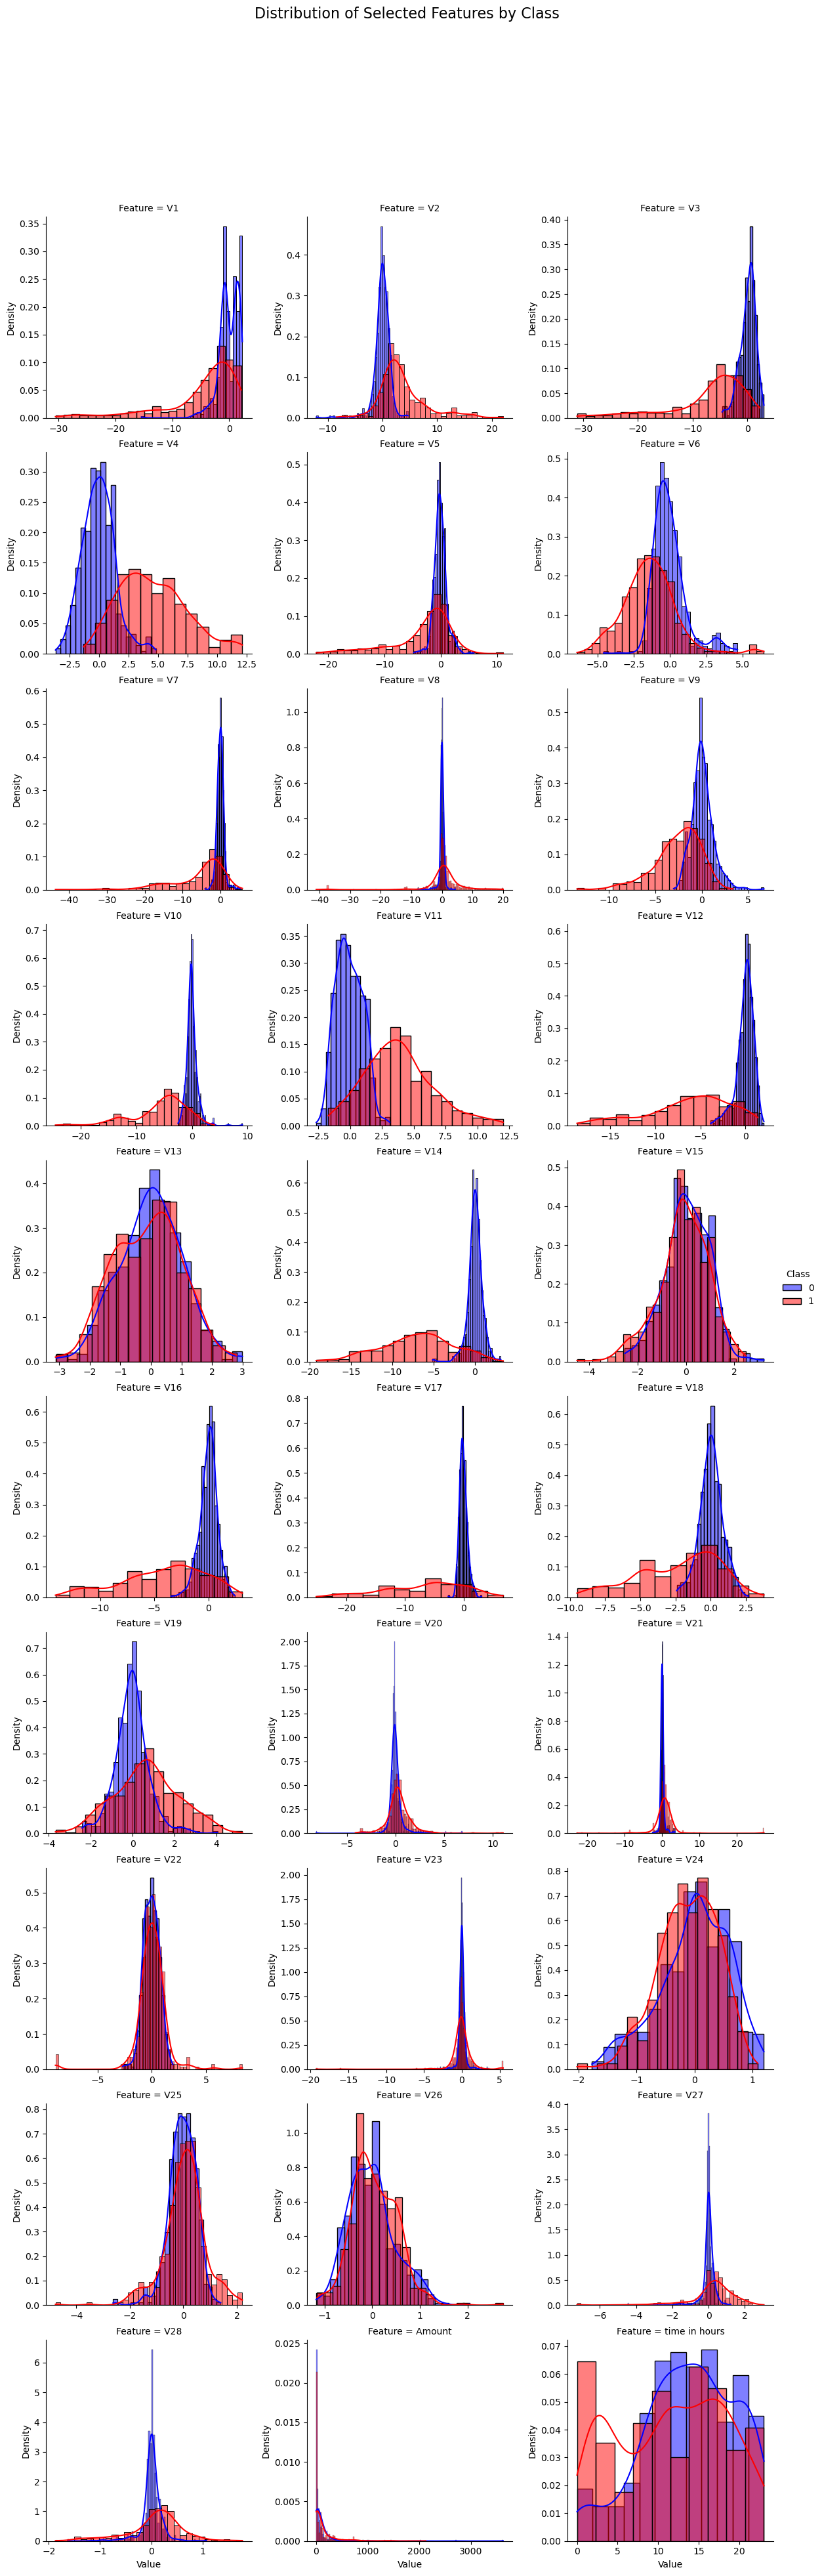

In [26]:

g = sns.FacetGrid(df4, col='Feature', hue='Class', col_wrap=3, sharex=False, sharey=False, height=4, palette={0: 'blue', 1: 'red'})
g.map(sns.histplot, 'Value', kde=True, stat='density')
g.add_legend(title='Class')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Selected Features by Class', fontsize=16)
1

In [27]:
X = df2.drop('Class',axis ='columns')
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,time in hours
99946,-5.542188,4.693302,-1.456197,-2.875245,-0.448021,-0.147467,0.363401,0.380882,4.672914,6.560468,...,-1.019085,-0.689417,0.009333,-1.377105,0.830742,0.715117,0.568422,-0.703844,0.92,18
180274,2.038586,-0.314360,-3.080258,-0.513300,2.719527,3.166604,-0.111837,0.658495,0.207281,0.145327,...,-0.021941,-0.001634,0.095978,0.751844,0.247373,0.399007,-0.066953,-0.078069,19.95,10
190476,-0.816523,0.946678,1.418825,-0.308202,-0.659385,-0.606325,-0.019709,0.492279,0.194087,-0.822514,...,0.282108,0.968226,-0.119641,0.455095,-0.330781,0.355592,0.267063,0.162586,7.57,11
262111,-1.719913,1.684964,-2.686866,-2.243432,2.698160,2.793060,-0.175211,2.001645,-0.902267,-2.001019,...,0.010891,-0.577457,0.014389,0.597849,-0.047423,0.128468,-0.568041,-0.057376,2.10,20
138217,-0.952598,1.048833,1.561880,0.355600,-0.270487,-0.376267,0.094704,0.558655,-0.700183,-0.664416,...,-0.139500,-0.652331,-0.056277,0.030380,-0.066819,0.264133,-0.087559,-0.013344,1.98,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,22
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,23
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,23
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,23


In [28]:
Y = df2.Class
Y

99946     0
180274    0
190476    0
262111    0
138217    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 992, dtype: int64

In [29]:
from sklearn.linear_model import LogisticRegression

# Model Training and Evaluation

In [30]:
model = LogisticRegression(max_iter=200,multi_class = 'ovr',random_state = 70
)
model

LogisticRegression(max_iter=200, multi_class='ovr', random_state=70)

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size =0.2,random_state = 100)

In [32]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=200, multi_class='ovr', random_state=70)

In [33]:
model.score(X_test,y_test)

0.9547738693467337

In [34]:
ypredict = model.predict(X_test)
ypredict

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0], dtype=int64)

In [35]:
cm = confusion_matrix(ypredict,y_test)
cm

array([[108,   5],
       [  4,  82]], dtype=int64)

<Axes: >

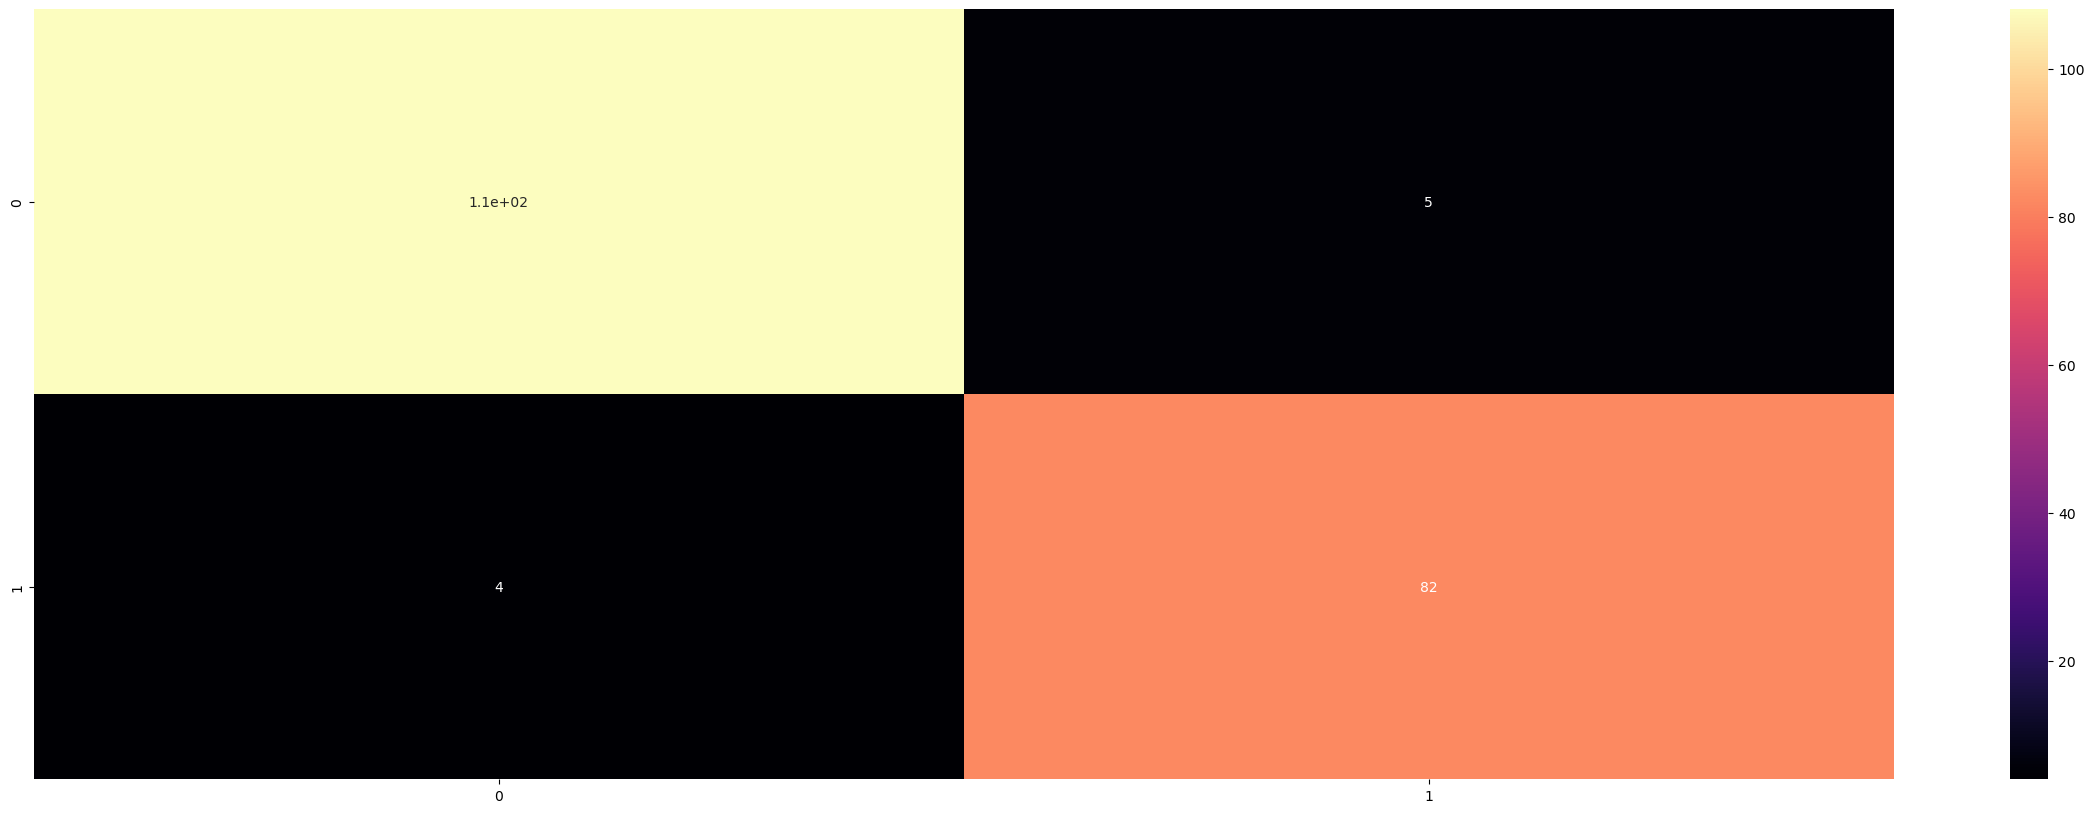

In [36]:
plt.figure(figsize = (30,10))
sns.heatmap(cm,cmap ='magma',annot = True)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


In [38]:
report = classification_report(ypredict,y_test)
report

'              precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96       113\n           1       0.94      0.95      0.95        86\n\n    accuracy                           0.95       199\n   macro avg       0.95      0.95      0.95       199\nweighted avg       0.95      0.95      0.95       199\n'

In [39]:
precision_score(ypredict,y_test)

0.9425287356321839

In [40]:
recall_score(ypredict,y_test)

0.9534883720930233

In [41]:
accuracy_score(ypredict,y_test)

0.9547738693467337

In [42]:
import joblib

In [43]:
joblib.dump(model,'model_fraud')

['model_fraud']

In [44]:
predict = joblib.load('model_fraud')
predict

LogisticRegression(max_iter=200, multi_class='ovr', random_state=70)

In [45]:
predict.score(X_test,y_test)

0.9547738693467337

# Thank you